In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodel.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xlrd

import warnings
warnings.filterwarnings('ignore')

In [13]:
data=pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
data.shape

(10683, 11)

In [16]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [17]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [21]:
df1=lab_enc.fit_transform(data['Airline'])
data['Airline']=df1

In [22]:
data.Date_of_Journey.value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [23]:
df1=lab_enc.fit_transform(data['Date_of_Journey'])
data['Date_of_Journey']=df1

In [24]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [25]:
df1=lab_enc.fit_transform(data['Source'])
data['Source']=df1

In [26]:
data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
df1=lab_enc.fit_transform(data['Destination'])
data['Destination']=df1

In [28]:
data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [29]:
df1=lab_enc.fit_transform(data['Route'])
data['Route']=df1

In [30]:
data.Dep_Time.value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [31]:
df1=lab_enc.fit_transform(data['Dep_Time'])
data['Dep_Time']=df1

In [32]:
df1=lab_enc.fit_transform(data['Arrival_Time'])
data['Arrival_Time']=df1

In [33]:
df1=lab_enc.fit_transform(data['Duration'])
data['Duration']=df1

In [34]:
df1=lab_enc.fit_transform(data['Total_Stops'])
data['Total_Stops']=df1

In [36]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
df1=lab_enc.fit_transform(data['Additional_Info'])
data['Additional_Info']=df1

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Date_of_Journey  10683 non-null  int32
 2   Source           10683 non-null  int32
 3   Destination      10683 non-null  int32
 4   Route            10683 non-null  int32
 5   Dep_Time         10683 non-null  int32
 6   Arrival_Time     10683 non-null  int32
 7   Duration         10683 non-null  int32
 8   Total_Stops      10683 non-null  int32
 9   Additional_Info  10683 non-null  int32
 10  Price            10683 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 500.9 KB


In [39]:
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

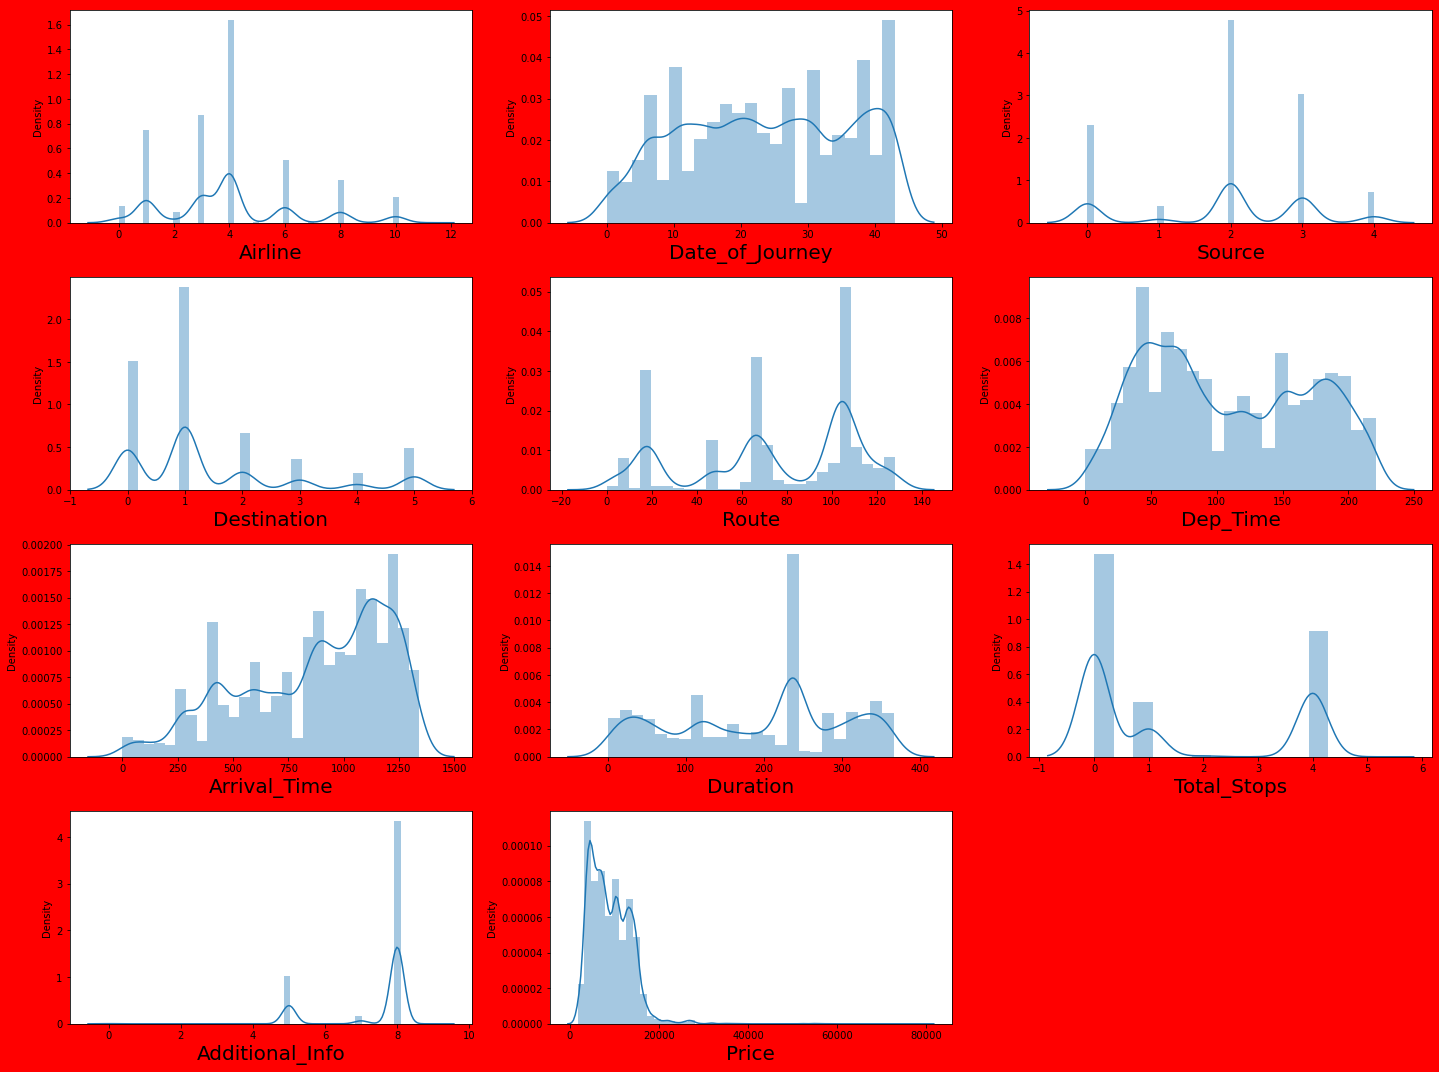

In [41]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [42]:
y = data['Price']
X = data.drop(columns = ['Price'])

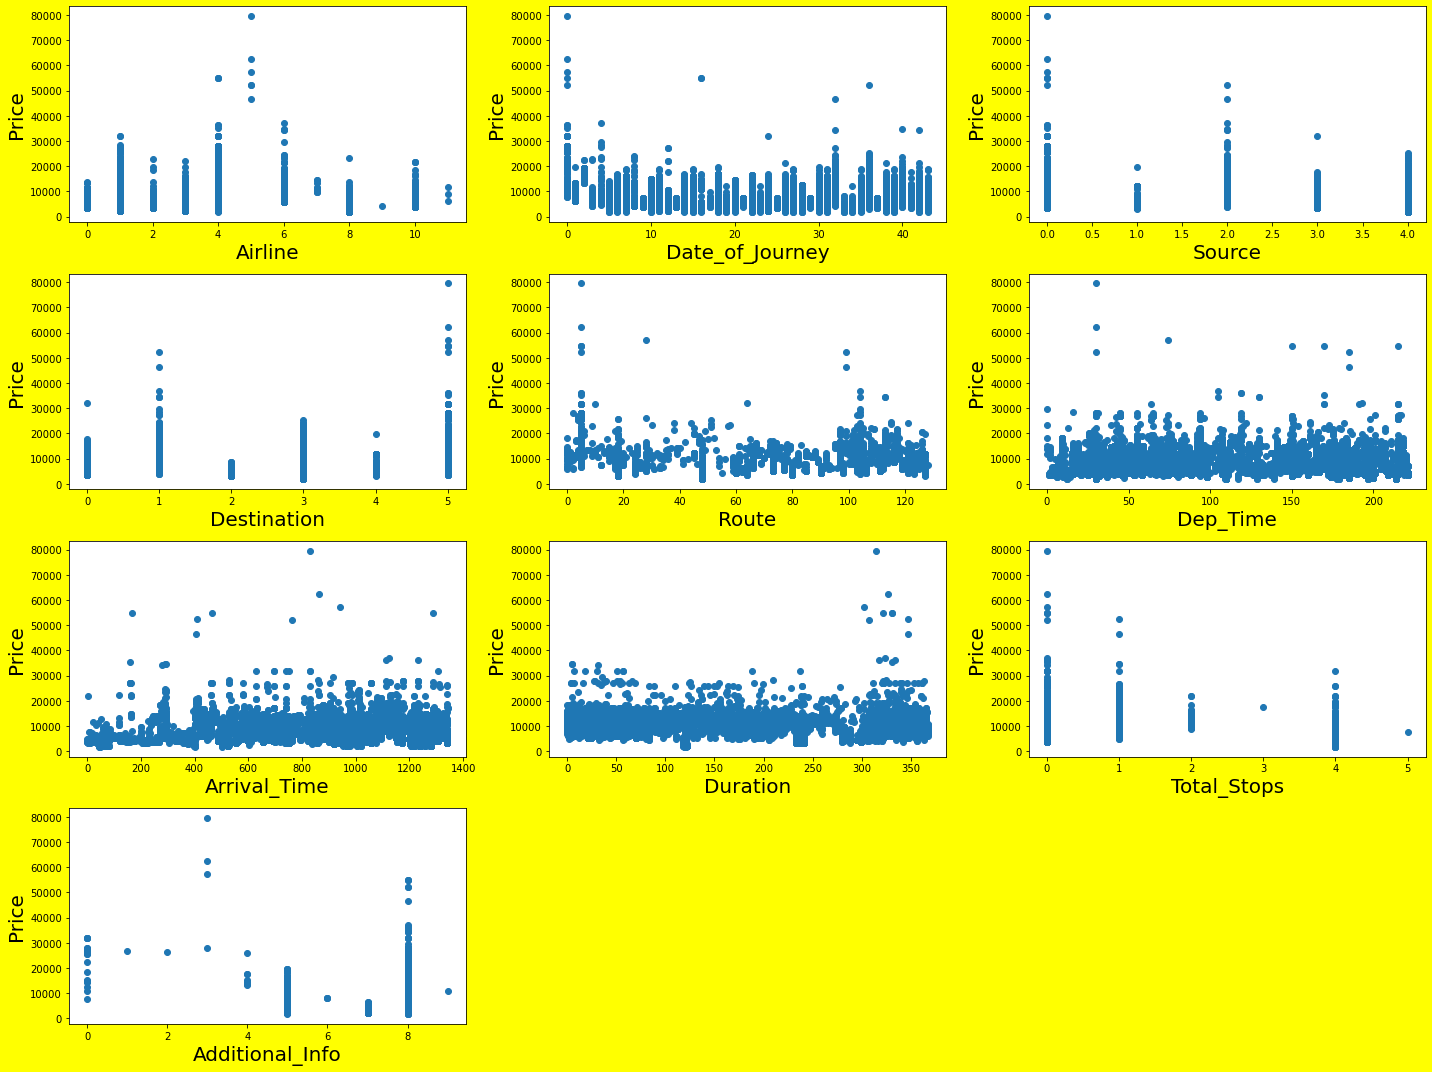

In [43]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

In [69]:
best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(X,y)

In [70]:
data_scores=pd.DataFrame(fit.scores_)

In [71]:
data_columns=pd.DataFrame(X.columns)

In [72]:
features_scores=pd.concat([data_columns,data_scores],axis=1)

In [73]:
features_scores.columns=['Features_Name','Score']

In [74]:
print(features_scores.nlargest(9,'Score'))

     Features_Name       Score
8      Total_Stops  332.435547
4            Route  251.493134
2           Source  182.712662
3      Destination  110.991356
0          Airline   78.838890
9  Additional_Info   54.922310
6     Arrival_Time    4.635370
7         Duration    3.499833
5         Dep_Time    2.997223


In [75]:
new_X=data[['Total_Stops','Route','Source','Destination','Airline','Additional_Info','Arrival_Time','Dep_Time']]

In [76]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_X)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from time import time

x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

start=time()
knn.fit(x_train,y_train)
print("Knn Training time",(time()-start))

start=time()
y_pred=knn.predict(x_test)
print("Knn Test time",(time()-start))

Knn Training time 0.02100372314453125
Knn Test time 0.06982302665710449


In [79]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [80]:
new_X

,Total_Stops,Route,Source,Destination,Airline,Additional_Info,Arrival_Time,Dep_Time
0,4,18,0,5,3,8,233,211
1,1,84,3,0,1,8,906,31
2,1,118,2,1,4,8,413,70
3,0,91,3,0,3,8,1324,164
4,0,29,0,5,3,8,1237,149
...,...,...,...,...,...,...,...,...
10678,4,64,3,0,0,8,1259,183
10679,4,64,3,0,1,8,1305,193
10680,4,18,0,2,4,8,824,58
10681,4,18,0,5,10,8,938,92


In [81]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [82]:
new_X

,Total_Stops,Route,Source,Destination,Airline,Additional_Info,Arrival_Time,Dep_Time
0,4,18,0,5,3,8,233,211
1,1,84,3,0,1,8,906,31
2,1,118,2,1,4,8,413,70
3,0,91,3,0,3,8,1324,164
4,0,29,0,5,3,8,1237,149
...,...,...,...,...,...,...,...,...
10678,4,64,3,0,0,8,1259,183
10679,4,64,3,0,1,8,1305,193
10680,4,18,0,2,4,8,824,58
10681,4,18,0,5,10,8,938,92


In [84]:
print('Price',regression.predict(scalar.transform([[1,108,2,1,1,8,1124,85]])))

Price [9519.71673793]


In [85]:
filename= 'Flight_Price_prediction.pickle'
pickle.dump(regression,open(filename,'wb'))

#prediciton using saved model
loaded_model=pickle.load(open(filename,'rb'))

a=loaded_model.predict(scalar.transform([[4,18,0,4,10,8,824,58]]))

a

array([6303.87691349])

In [86]:
regression.score(x_train,y_train)

0.3414442734674842

KeyError: 0

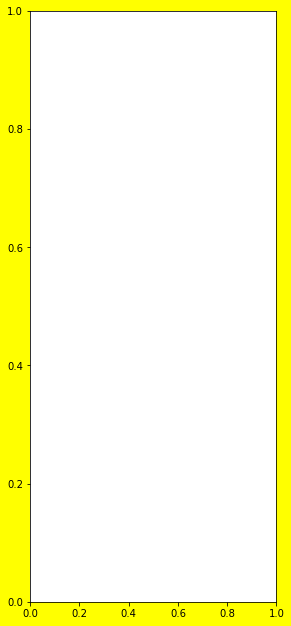

In [200]:
plt.figure(figsize=(15,50), facecolor='yellow')
graph=1

for column in new_X:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        #sns.boxplot(df_features[column],orient='v')
        ax=sns.boxplot(data=new_X[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [155]:
data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.0,3149.000000
mean,3.450619,25.382344,2.489044,1.027945,88.983804,111.163544,847.989203,201.047634,1.267704,8.0,9662.639251
std,0.559534,11.753067,0.752985,1.128292,24.403299,63.061054,339.681062,110.796717,1.738579,0.0,4759.132901
min,2.000000,4.000000,1.000000,0.000000,38.000000,0.000000,1.000000,0.000000,0.000000,8.0,2227.000000
25%,3.000000,15.000000,2.000000,0.000000,66.000000,54.000000,553.000000,120.000000,0.000000,8.0,5298.000000
50%,3.000000,26.000000,2.000000,1.000000,99.000000,112.000000,921.000000,234.000000,0.000000,8.0,8177.000000
75%,4.000000,36.000000,3.000000,1.000000,106.000000,172.000000,1109.000000,309.000000,4.000000,8.0,14151.000000
max,5.000000,43.000000,4.000000,4.000000,127.000000,220.000000,1340.000000,365.000000,4.000000,8.0,52285.000000


In [201]:
new_X.describe()

,Total_Stops,Route,Source,Destination,Airline,Additional_Info,Arrival_Time,Dep_Time
count,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.0,3149.000000,3149.000000
mean,1.267704,88.983804,2.489044,1.027945,3.450619,8.0,847.989203,111.163544
std,1.738579,24.403299,0.752985,1.128292,0.559534,0.0,339.681062,63.061054
min,0.000000,38.000000,1.000000,0.000000,2.000000,8.0,1.000000,0.000000
25%,0.000000,66.000000,2.000000,0.000000,3.000000,8.0,553.000000,54.000000
50%,0.000000,99.000000,2.000000,1.000000,3.000000,8.0,921.000000,112.000000
75%,4.000000,106.000000,3.000000,1.000000,4.000000,8.0,1109.000000,172.000000
max,4.000000,127.000000,4.000000,4.000000,5.000000,8.0,1340.000000,220.000000


In [159]:
q1=new_X.quantile(0.25)

#3rd Quantile
q3=new_X.quantile(0.75)

iqr=q3-q1

In [160]:
Airline_high=q3.Airline +(1.5*iqr.Airline)
Airline_high

5.5

In [161]:
index=np.where(data['Airline']>Airline_high)
index

(array([], dtype=int64),)

In [162]:
data=data.drop(data.index[index])
data
data.reset_index()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,4,43,2,1,118,70,413,106,1,8,13882
1,3,3,10,3,0,91,164,1324,311,0,8,6218
2,11,3,17,3,0,64,188,1280,237,4,8,4174
3,14,3,25,3,0,64,154,1158,237,4,8,4804
4,20,2,36,2,1,104,120,1148,308,0,8,19495
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,10653,4,6,3,0,66,119,842,144,0,8,14388
3145,10655,4,34,4,3,48,12,399,120,4,8,5678
3146,10665,3,29,3,0,64,132,1024,236,4,8,4804
3147,10668,4,42,2,1,117,94,1093,335,1,8,21219


In [163]:
Additional_Info_high=q3.Additional_Info +(1.5*iqr.Additional_Info)
Additional_Info_high

8.0

In [164]:
index=np.where(data['Additional_Info']>Additional_Info_high)
index

data=data.drop(data.index[index])
data
data.reset_index()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,4,43,2,1,118,70,413,106,1,8,13882
1,3,3,10,3,0,91,164,1324,311,0,8,6218
2,11,3,17,3,0,64,188,1280,237,4,8,4174
3,14,3,25,3,0,64,154,1158,237,4,8,4804
4,20,2,36,2,1,104,120,1148,308,0,8,19495
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,10653,4,6,3,0,66,119,842,144,0,8,14388
3145,10655,4,34,4,3,48,12,399,120,4,8,5678
3146,10665,3,29,3,0,64,132,1024,236,4,8,4804
3147,10668,4,42,2,1,117,94,1093,335,1,8,21219


In [165]:
Additional_Info_low=q1.Additional_Info - (1.5*iqr.Additional_Info)
Additional_Info_low
print(Additional_Info_low)

#Check which index having data larger than 13.5
index=np.where(data['Additional_Info']< Additional_Info_low)

data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

8.0
(3149, 11)


,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,4,43,2,1,118,70,413,106,1,8,13882
1,3,3,10,3,0,91,164,1324,311,0,8,6218
2,11,3,17,3,0,64,188,1280,237,4,8,4174
3,14,3,25,3,0,64,154,1158,237,4,8,4804
4,20,2,36,2,1,104,120,1148,308,0,8,19495
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,10653,4,6,3,0,66,119,842,144,0,8,14388
3145,10655,4,34,4,3,48,12,399,120,4,8,5678
3146,10665,3,29,3,0,64,132,1024,236,4,8,4804
3147,10668,4,42,2,1,117,94,1093,335,1,8,21219


In [166]:
Airline_low=q1.Airline - (1.5*iqr.Airline)
Airline_low
print(Airline_low)

#Check which index having data larger than 13.5
index=np.where(data['Airline']< Airline_low)

data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.5
(3149, 11)


,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,4,43,2,1,118,70,413,106,1,8,13882
1,3,3,10,3,0,91,164,1324,311,0,8,6218
2,11,3,17,3,0,64,188,1280,237,4,8,4174
3,14,3,25,3,0,64,154,1158,237,4,8,4804
4,20,2,36,2,1,104,120,1148,308,0,8,19495
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,10653,4,6,3,0,66,119,842,144,0,8,14388
3145,10655,4,34,4,3,48,12,399,120,4,8,5678
3146,10665,3,29,3,0,64,132,1024,236,4,8,4804
3147,10668,4,42,2,1,117,94,1093,335,1,8,21219


In [167]:
Source_low=q1.Source - (1.5*iqr.Source)
Source_low
print(Source_low)

#Check which index having data larger than 13.5
index=np.where(data['Source']< Source_low)

data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.5
(3149, 11)


,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,4,43,2,1,118,70,413,106,1,8,13882
1,3,3,10,3,0,91,164,1324,311,0,8,6218
2,11,3,17,3,0,64,188,1280,237,4,8,4174
3,14,3,25,3,0,64,154,1158,237,4,8,4804
4,20,2,36,2,1,104,120,1148,308,0,8,19495
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,10653,4,6,3,0,66,119,842,144,0,8,14388
3145,10655,4,34,4,3,48,12,399,120,4,8,5678
3146,10665,3,29,3,0,64,132,1024,236,4,8,4804
3147,10668,4,42,2,1,117,94,1093,335,1,8,21219


KeyError: 0

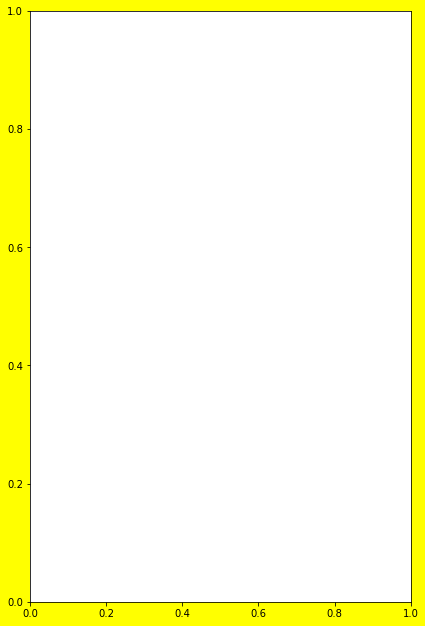

In [202]:
plt.figure(figsize=(15,50), facecolor='yellow')
graph=1

for column in new_X:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        #sns.boxplot(df_fe atures[column],orient='v')
        ax=sns.boxplot(data=new_X[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [192]:
new_X.describe()

,Total_Stops,Route,Source,Destination,Airline,Additional_Info,Arrival_Time,Dep_Time
count,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.0,3149.000000,3149.000000
mean,1.267704,88.983804,2.489044,1.027945,3.450619,8.0,847.989203,111.163544
std,1.738579,24.403299,0.752985,1.128292,0.559534,0.0,339.681062,63.061054
min,0.000000,38.000000,1.000000,0.000000,2.000000,8.0,1.000000,0.000000
25%,0.000000,66.000000,2.000000,0.000000,3.000000,8.0,553.000000,54.000000
50%,0.000000,99.000000,2.000000,1.000000,3.000000,8.0,921.000000,112.000000
75%,4.000000,106.000000,3.000000,1.000000,4.000000,8.0,1109.000000,172.000000
max,4.000000,127.000000,4.000000,4.000000,5.000000,8.0,1340.000000,220.000000


In [193]:
data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.0,3149.000000
mean,3.450619,25.382344,2.489044,1.027945,88.983804,111.163544,847.989203,201.047634,1.267704,8.0,9662.639251
std,0.559534,11.753067,0.752985,1.128292,24.403299,63.061054,339.681062,110.796717,1.738579,0.0,4759.132901
min,2.000000,4.000000,1.000000,0.000000,38.000000,0.000000,1.000000,0.000000,0.000000,8.0,2227.000000
25%,3.000000,15.000000,2.000000,0.000000,66.000000,54.000000,553.000000,120.000000,0.000000,8.0,5298.000000
50%,3.000000,26.000000,2.000000,1.000000,99.000000,112.000000,921.000000,234.000000,0.000000,8.0,8177.000000
75%,4.000000,36.000000,3.000000,1.000000,106.000000,172.000000,1109.000000,309.000000,4.000000,8.0,14151.000000
max,5.000000,43.000000,4.000000,4.000000,127.000000,220.000000,1340.000000,365.000000,4.000000,8.0,52285.000000


In [194]:
y = data['Price']
X = data.drop(columns = ['Price'])

In [203]:
new_X=data[['Total_Stops','Route','Source','Destination','Airline','Additional_Info','Arrival_Time','Dep_Time']]

In [204]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_X)

In [206]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [207]:
print('Price',regression.predict(scalar.transform([[1,108,2,1,1,8,1124,85]])))

Price [9585.15018425]


In [208]:
regression.score(x_train,y_train)

0.3414442734674842

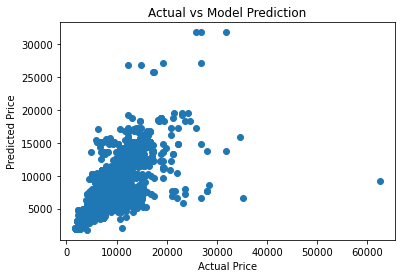

In [210]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Model Prediction')
plt.show()

In [ ]:
filename= 'Flight_Price_prediction.pickle'
pickle.dump(regression,open(filename,'wb'))

#prediciton using saved model
loaded_model=pickle.load(open(filename,'rb'))

a=loaded_model.predict(scalar.transform([[4,18,0,4,10,8,824,58]]))

a